In [11]:
from PIL import Image
import pytesseract
import numpy as np
import os
pytesseract.pytesseract.tesseract_cmd = os.path.join('E:', os.sep,'Tesseract-OCR','tesseract')

In [12]:
filename = os.path.join("..","test-data","book_shelf.jpg")
img1 = np.array(Image.open(filename))
text = pytesseract.image_to_string(img1)

In [13]:
print(text)

RARUKI MURAKAMI

The Adventures of

IBN BATTUTA

Max Tegmark 4 tm
Our Mathematical Universe
ya SON OF THE STARS 2007

DUNE

Sa TIN 3NITIOVN BID 8ID \

Whe NMR ERS
AMARA
NDA




In [4]:
import cv2
import numpy as np
import os
filename = os.path.join("..","test-data","book_shelf.jpg")
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
x1_np, x2_np, y1_np, y2_np = np.array([]),np.array([]),np.array([]),np.array([])
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    x1_np = np.append(x1_np, x1)
    x2_np = np.append(x2_np, x2)
    y1_np = np.append(y1_np, y1)
    y2_np = np.append(y2_np, y2)
    #cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

# cv2.imwrite('houghlines3.jpg',img)

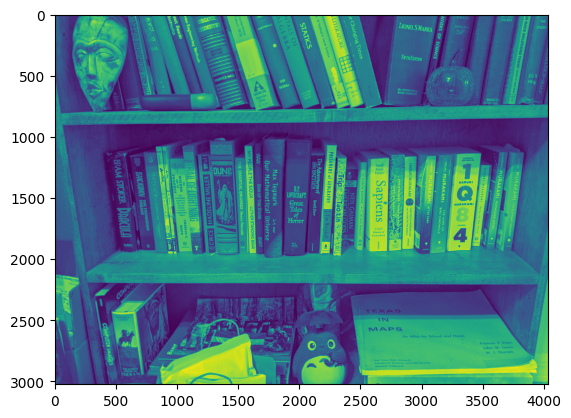

In [10]:
import matplotlib.pyplot as plt
plt.imshow(gray)

In [8]:
import numpy as np
import os
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data, io

import matplotlib.pyplot as plt
from matplotlib import cm

filename = os.path.join("..","test-data","book_shelf.jpg")
image = io.imread(filename, as_gray=True)


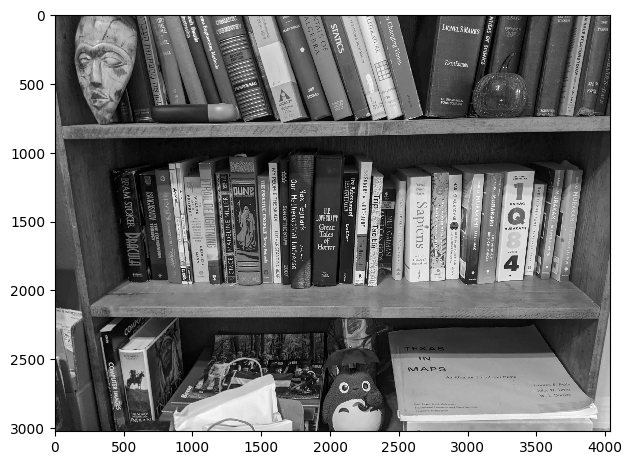

In [9]:
io.imshow(image)

In [10]:
image.shape

(3024, 4032)

In [11]:
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)


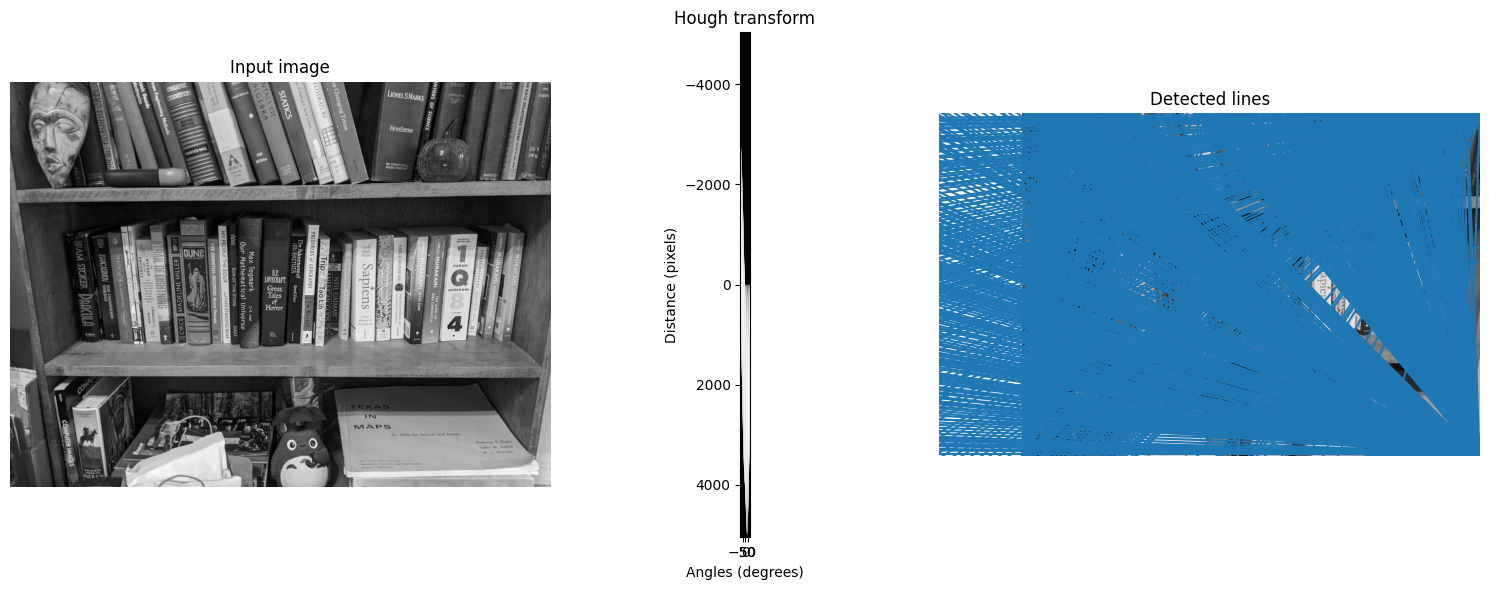

In [12]:

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

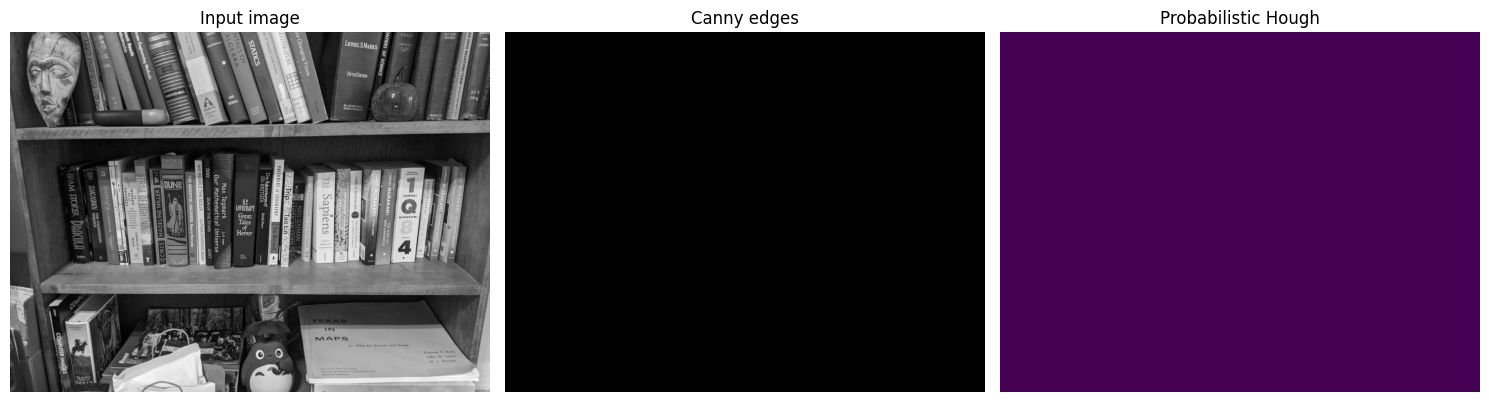

In [16]:
from skimage.transform import probabilistic_hough_line
import os
# Line finding using the Probabilistic Hough Transform
filename = os.path.join("..","test-data","book_shelf.jpg")
image = io.imread(filename, as_gray=True)
edges = canny(image, 1, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import os
import cv2
filename = os.path.join("..","test-data","book_shelf.jpg")
src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
dst = cv2.Canny(src, 50, 200, None, 3)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)


In [4]:
import math
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

In [12]:
linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 100, None, 100, 10)

In [13]:
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

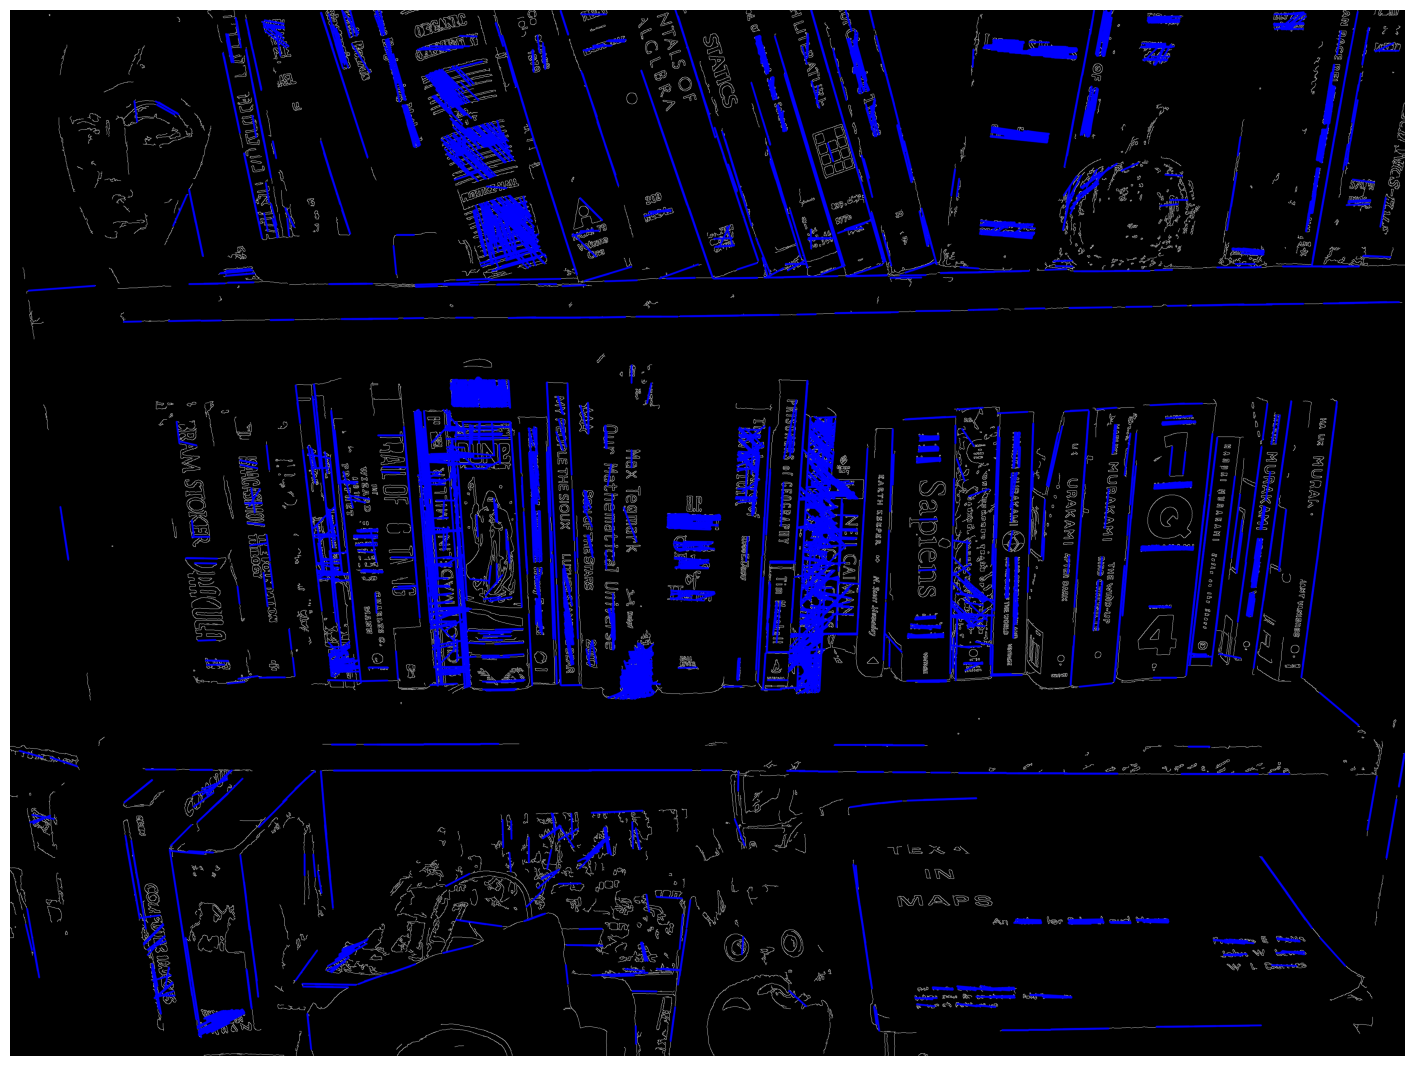

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.axis('off')
plt.imshow(src)
# plt.imshow(cdst)
plt.imshow(cdstP)
plt.show()